In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
pd.set_option('display.max_columns', None)

/var/folders/kl/zk6vhzq10g1dwngp4jd35vvr0000gp/T/ipykernel_76713/1145197323.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was too old on your system - pyarrow 10.0.1 is the current minimum supported version as of this release.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
FF = pd.read_excel('../LeagueHistory.xlsx', sheet_name='2025') \
    .drop(['TOTAL', 'Mean', 'Std', 'Median','Year','Owner'], axis=1) \
    .drop([12],axis=0)
#add playoffs and place later
    
labels = np.array(FF['Team_Name'])

FF

Team_Name  Week 1  Week 2  Week 3  Week 4  Week 5  Week 6  \
0           GOBias Industries  145.62  123.28   92.16  105.90   99.02  146.30   
1              Herbin Legends   93.58   78.44  115.64  120.10  114.60  158.82   
2            Blunt Dissection   77.84  141.78  139.86  135.10  151.22   87.98   
3                     Schmaap  102.62  115.64   91.98  116.46  101.24  124.94   
4            Fuck wit Tre Day  122.66   76.12  121.22  112.46  101.84   75.00   
5        Mr. Fans Noodle Haus  119.12  114.48   92.62   96.78  133.18  126.96   
6         Pay Dirt & Pylons V  113.20  114.86  140.82  115.08  111.42  102.98   
7   Grip Hamilton Memorial 5k  104.88  196.40   84.32  114.18  145.46   97.24   
8     Tony Horton Hears a Who   98.62  122.00  117.20  107.92  107.04  114.94   
9            Gee Whiz Darnell  113.36  116.70  130.82  106.18  122.86   77.44   
10              Pierogi Night   92.52  127.44   90.24  126.16  128.18  109.54   
11              Sackwash Lyfe   93.62   60.74  106.56  156.84  113.58   99.80   

    Week 7  Week 8  Week 9  Week 10  Week 11  Week 12  Week 13  Week 14  \
0   130.52  173.92  135.70    84.62   108.46   132.96   102.34   140.56   
1   151.64  109.56  148.04   131.62   126.10   134.56   129.10    95.30   
2   156.64  119.56  131.80   147.30    92.14   124.08   104.34    86.40   
3   121.74  110.24  157.38    93.02   104.22   109.64   125.36   107.76   
4   121.06  135.62  111.42   128.54   158.78    94.32    99.42   153.34   
5   118.22  111.68   87.98   106.60   119.52    89.74   112.44    69.20   
6    70.78   97.76  116.30   137.10    87.80    73.32    96.44    88.86   
7    97.32   69.58  110.32    51.62    70.20   114.84   101.76    83.48   
8   137.54  109.48  113.80   150.50    70.54   143.42   146.82   131.14   
9   107.28  102.02  115.06    85.84   106.62   106.32    91.94   148.64   
10   97.06   90.12  109.60   119.98   128.12    94.86   110.40   101.14   
11  141.32   87.06  105.14   101.78    72.74   106.26    99.96   119.96   

    Playoffs  Place  Wins  Losses  Diff_Baseline  
0        1.0    1.0  10.0     4.0      10.346310  
1        1.0    2.0  10.0     4.0       9.327738  
2        1.0    3.0   9.0     5.0       8.537738  
3        1.0    4.0   9.0     5.0       0.409167  
4        1.0    5.0   7.0     7.0       2.520595  
5        1.0    6.0   7.0     7.0      -5.570833  
6        0.0    7.0   6.0     8.0      -7.842262  
7        0.0    8.0   6.0     8.0      -9.636548  
8        0.0    9.0   5.0     9.0       6.746310  
9        0.0   10.0   5.0     9.0      -3.245119  
10       0.0   11.0   5.0     9.0      -3.653690  
11       0.0   12.0   5.0     9.0      -7.939405

In [5]:
averages = np.zeros(14)
for z in range(14):
    averages[z] = np.mean(FF.loc[:,'Week '+str(z+1)])

cumulatives = np.zeros(168).reshape(12, 14)
for c in range(14):
    for r in range(12):
        cumulatives[r, c] = np.sum(FF.loc[r, 'Week 1': 'Week '+str(c+1)])
    
average_cum_per_week = np.mean(cumulatives, axis=0)
average_cum_per_week

array([ 106.47      ,  222.12666667,  332.41333333,  450.17666667,
        569.31333333,  679.475     ,  800.40166667,  910.11833333,
       1030.33      , 1141.87333333, 1245.64333333, 1356.00333333,
       1466.03      , 1576.51166667])

In [6]:
cum_diffs = cumulatives.copy()
for r in range(12):
    cum_diffs[r,:] = cum_diffs[r,:] - average_cum_per_week

cum_diffs = np.hstack((np.zeros(24).reshape(12,2), cum_diffs))
cum_diffs = cum_diffs[:, 1:]

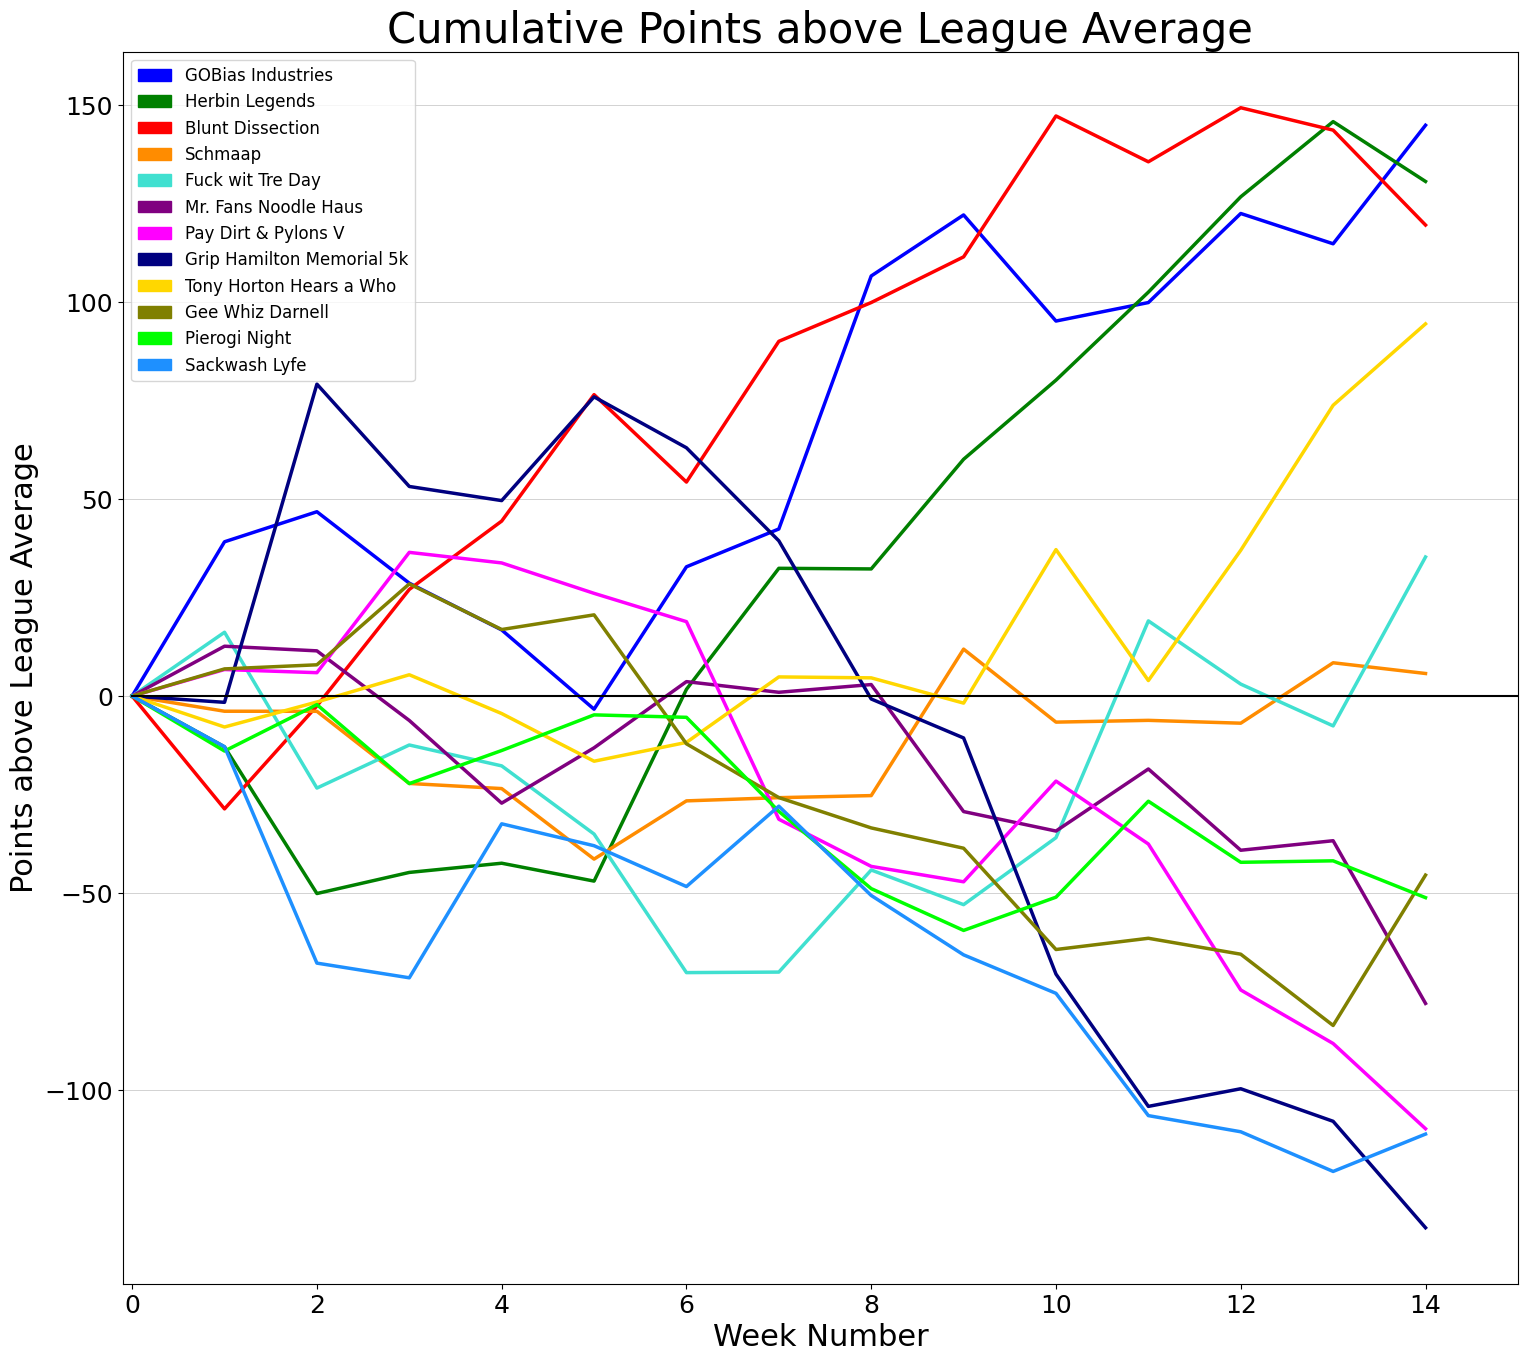

In [22]:
plt.figure(figsize=[18, 16])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    plt.plot(np.array(cum_diffs[i,:]), colors[i], lw=2.5)
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))
    

plt.plot([0.0,15], [0,0], color = 'k')

plt.xlim([-0.1, 15])
plt.xlabel('Week Number', size=22)
plt.ylabel('Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title('Cumulative Points above League Average', size=30)

plt.legend(handles=patches,prop={'size':12})
plt.grid(axis='y', lw=0.4)

# Herbin Legends: 2nd Half Surge 

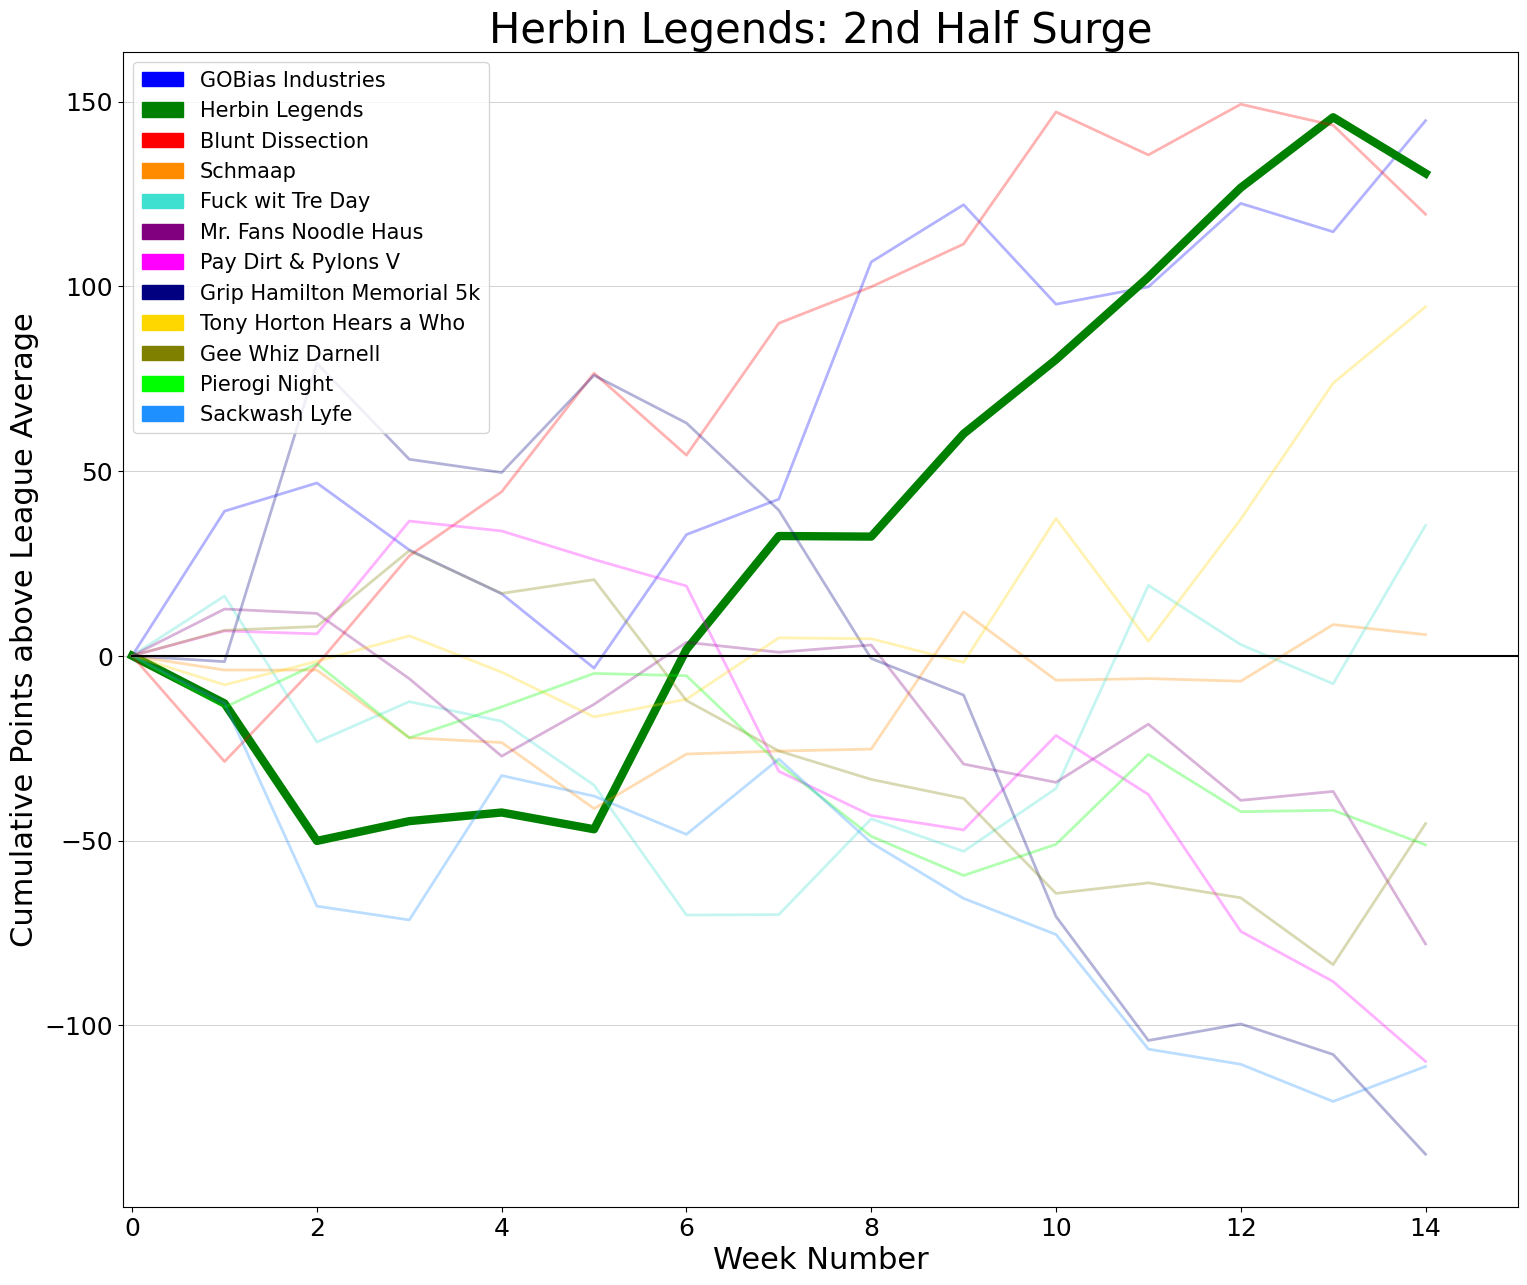

In [9]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    # Regular line plot for all lines except green
    if i != 1:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=2, alpha = 0.3)
    else:
    # For the green line, plot in two parts: before and after bold section
        #plt.plot(np.array(cum_diffs[i, :6]), colors[i], lw=4)  # Regular width for weeks 1-5
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=6)   # Bold for weeks 10-13
        #plt.plot(range(14, 15), np.array(cum_diffs[i, 14:]), colors[i], lw=4)   # Regular width for weeks 14 onwards
        
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))

plt.plot([0.0, 15], [0, 0], color='k')

plt.xlim([-0.1, 15])
plt.xlabel('Week Number', size=22)
plt.ylabel('Cumulative Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Herbin Legends: 2nd Half Surge", size=30)

plt.legend(handles=patches, prop={'size': 15})
plt.grid(axis='y', lw=0.4)

# GOBias Industries 

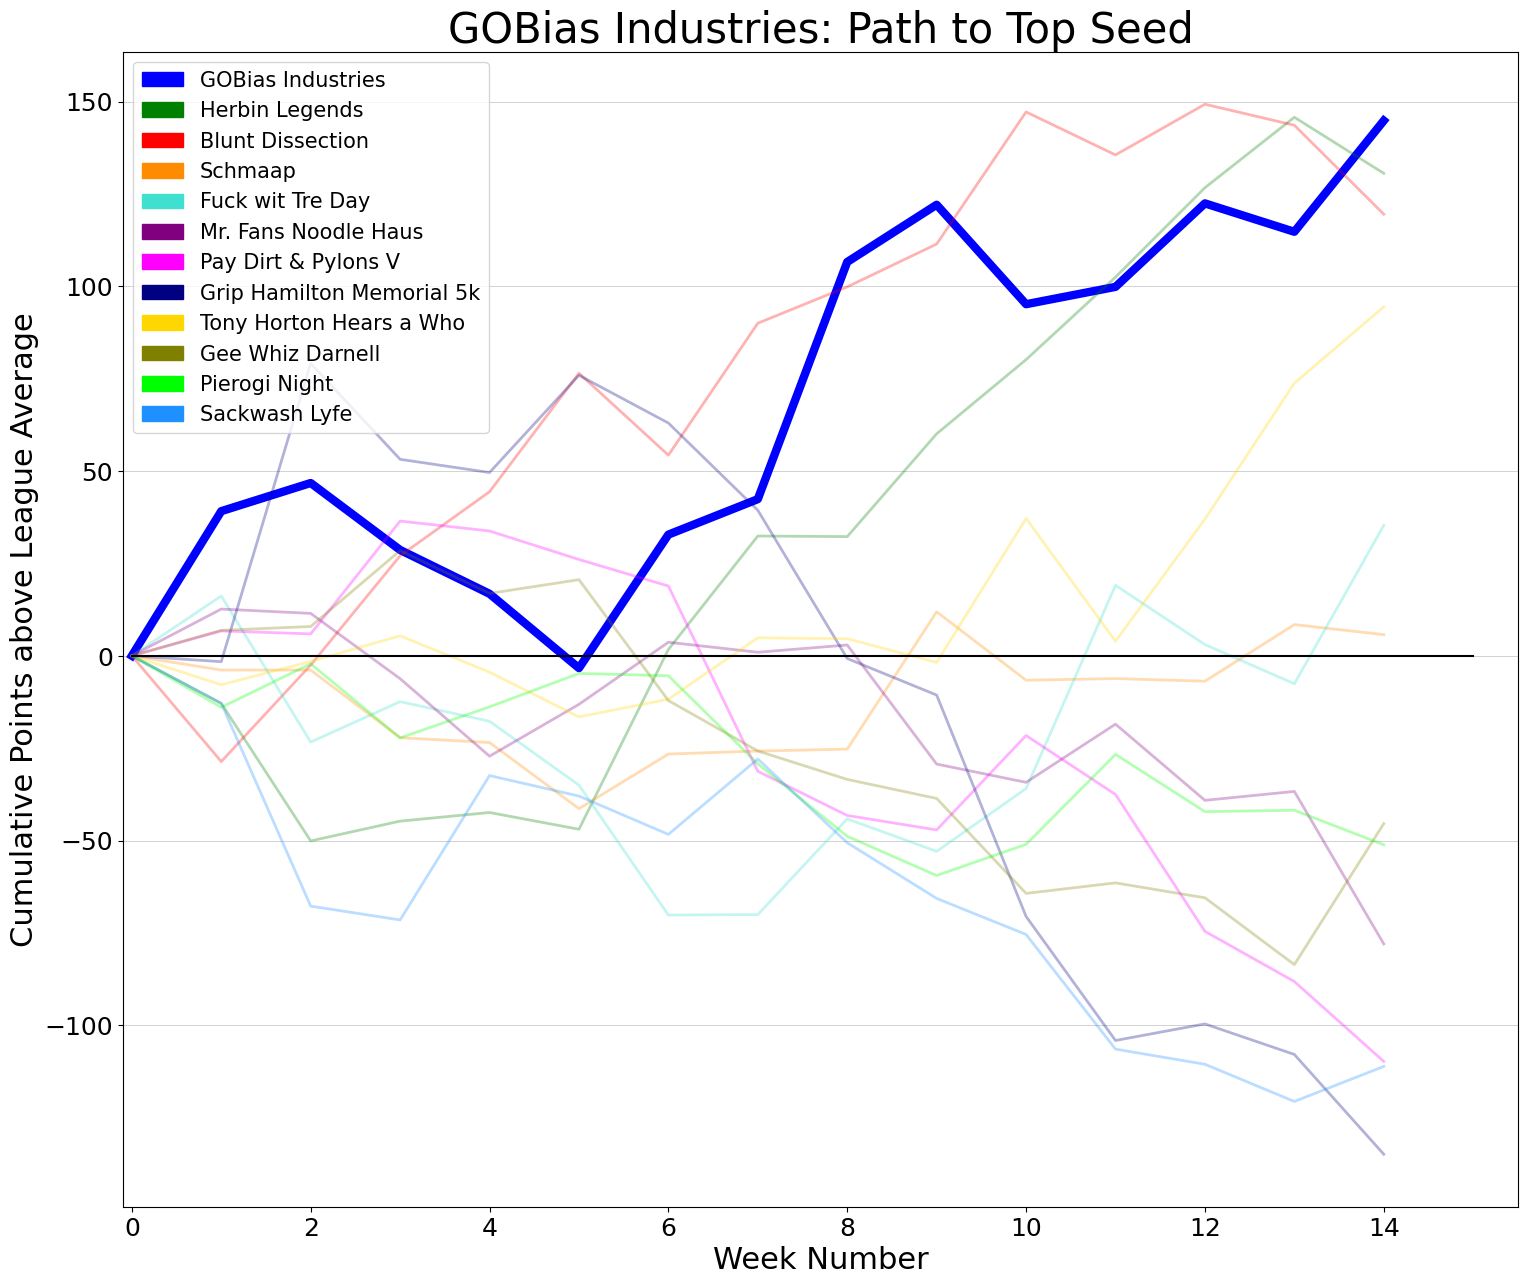

In [33]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    # Regular line plot for all lines except green
    if i != 0:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=2, alpha = 0.3)
    else:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=6)  # wider 1-9
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))

plt.plot([0.0, 15], [0, 0], color='k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Cumulative Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("GOBias Industries: Path to Top Seed", size=30)

plt.legend(handles=patches, prop={'size': 15})
plt.grid(axis='y', lw=0.4)

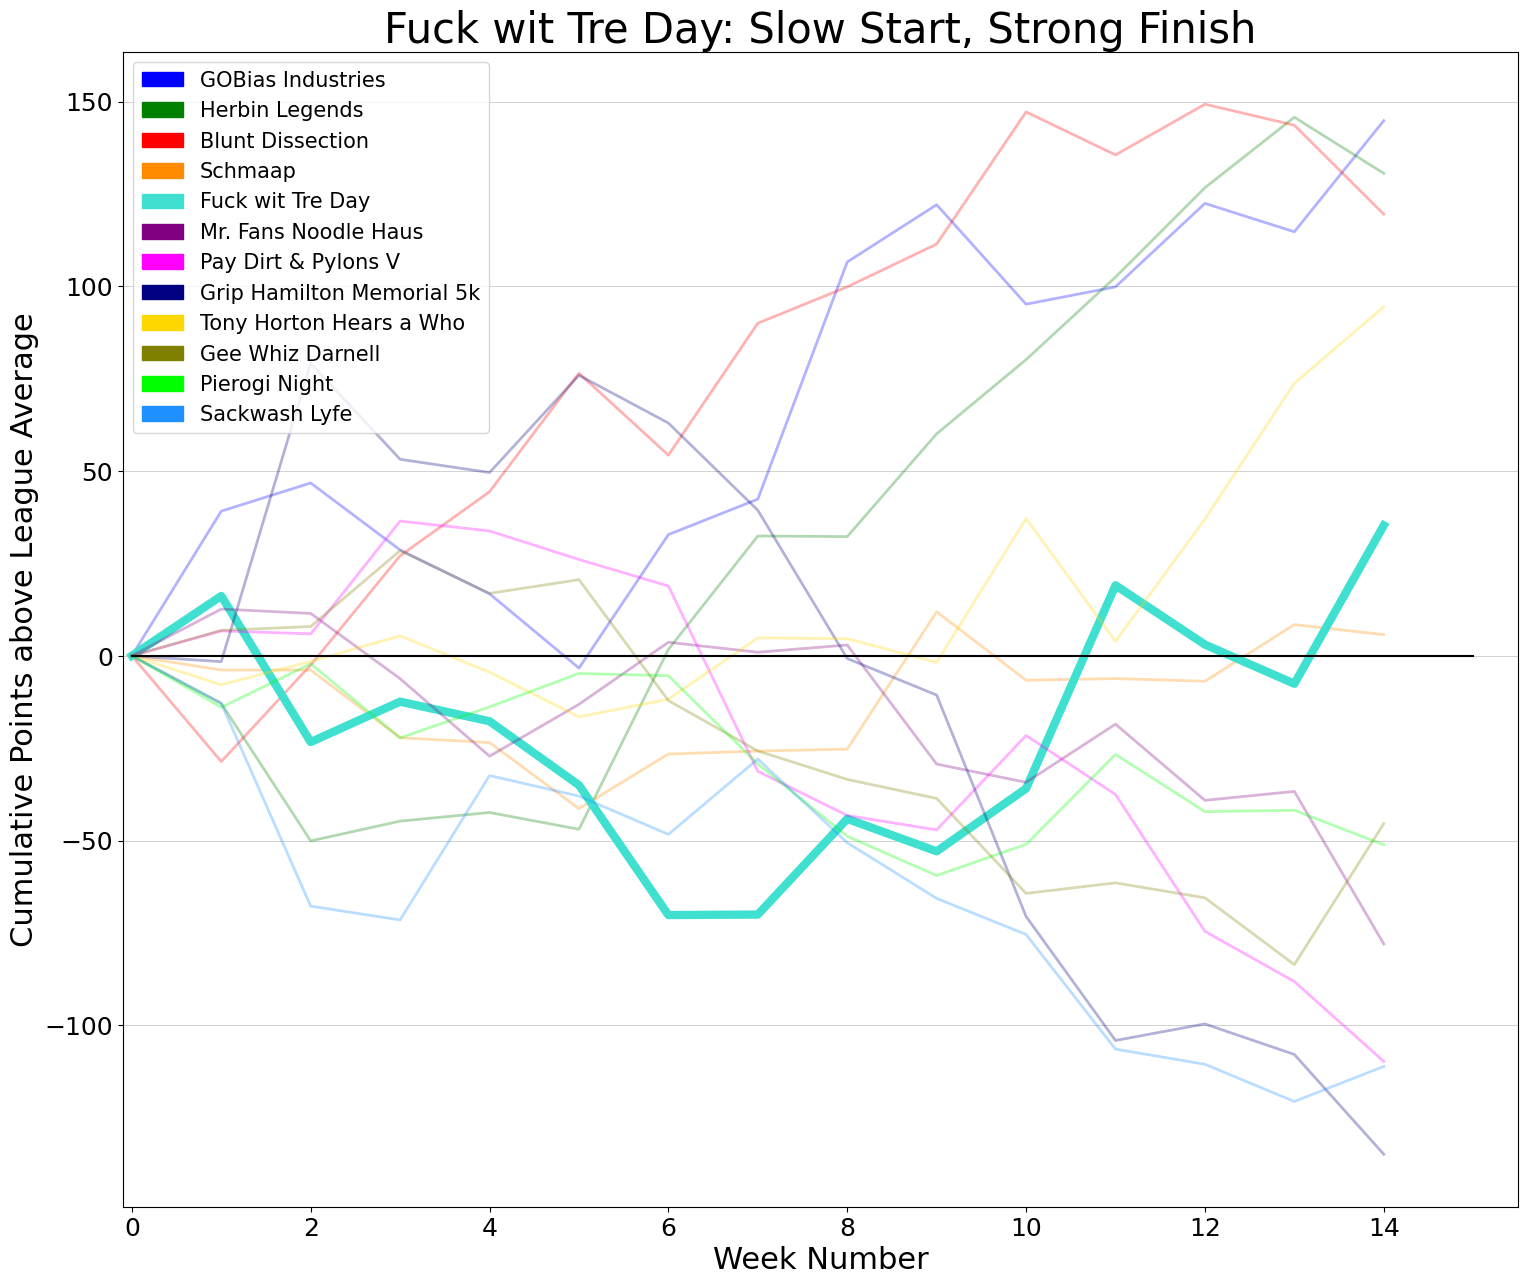

In [10]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    # Regular line plot for all lines except green
    if i != 4:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=2, alpha = 0.3)
    else:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=6)  # wider 1-9
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))

plt.plot([0.0, 15], [0, 0], color='k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Cumulative Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Fuck wit Tre Day: Slow Start, Strong Finish", size=30)

plt.legend(handles=patches, prop={'size': 15})
plt.grid(axis='y', lw=0.4)

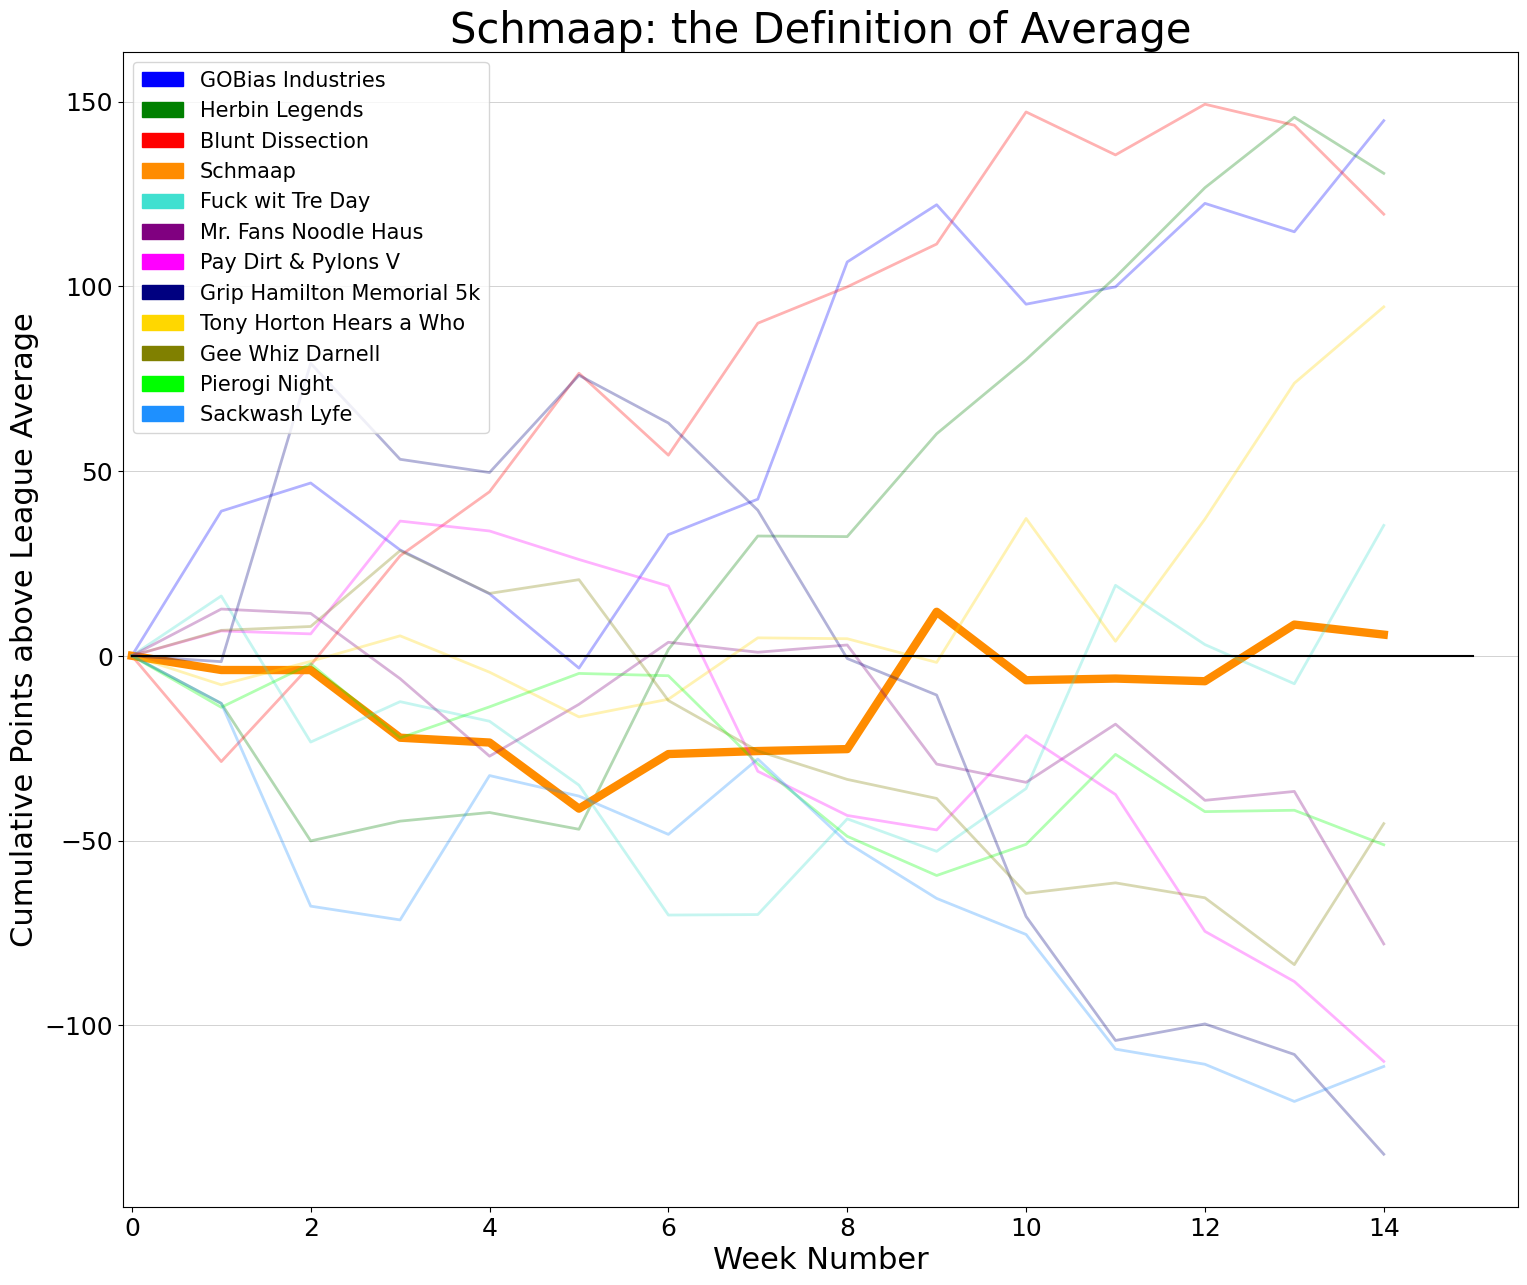

In [25]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    # Regular line plot for all lines except green
    if i != 3:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=2, alpha = 0.3)
    else:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=6)  # wider 1-9
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))

plt.plot([0.0, 15], [0, 0], color='k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Cumulative Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Schmaap: the Definition of Average", size=30)

plt.legend(handles=patches, prop={'size': 15})
plt.grid(axis='y', lw=0.4)

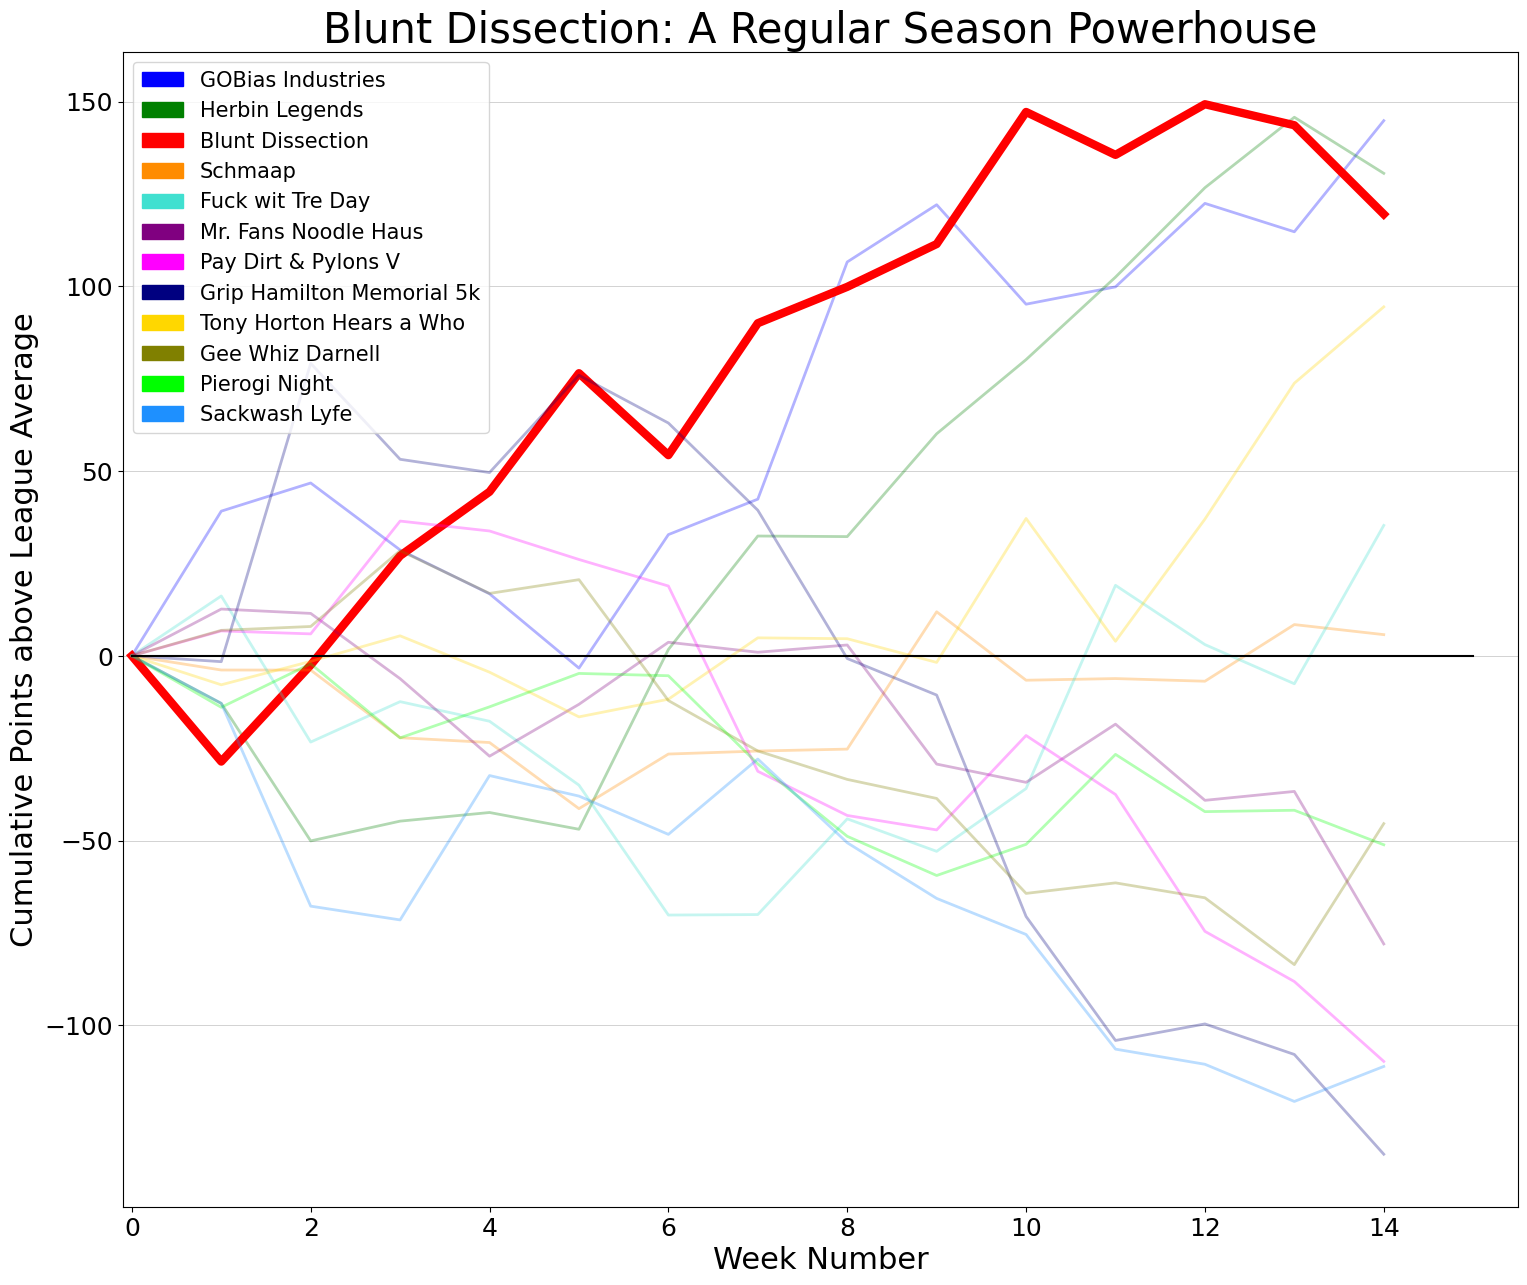

In [13]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    # Regular line plot for all lines except green
    if i != 2:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=2, alpha = 0.3)
    else:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=6)  # wider 1-9
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))

plt.plot([0.0, 15], [0, 0], color='k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Cumulative Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Blunt Dissection: A Regular Season Powerhouse", size=30)

plt.legend(handles=patches, prop={'size': 15})
plt.grid(axis='y', lw=0.4)

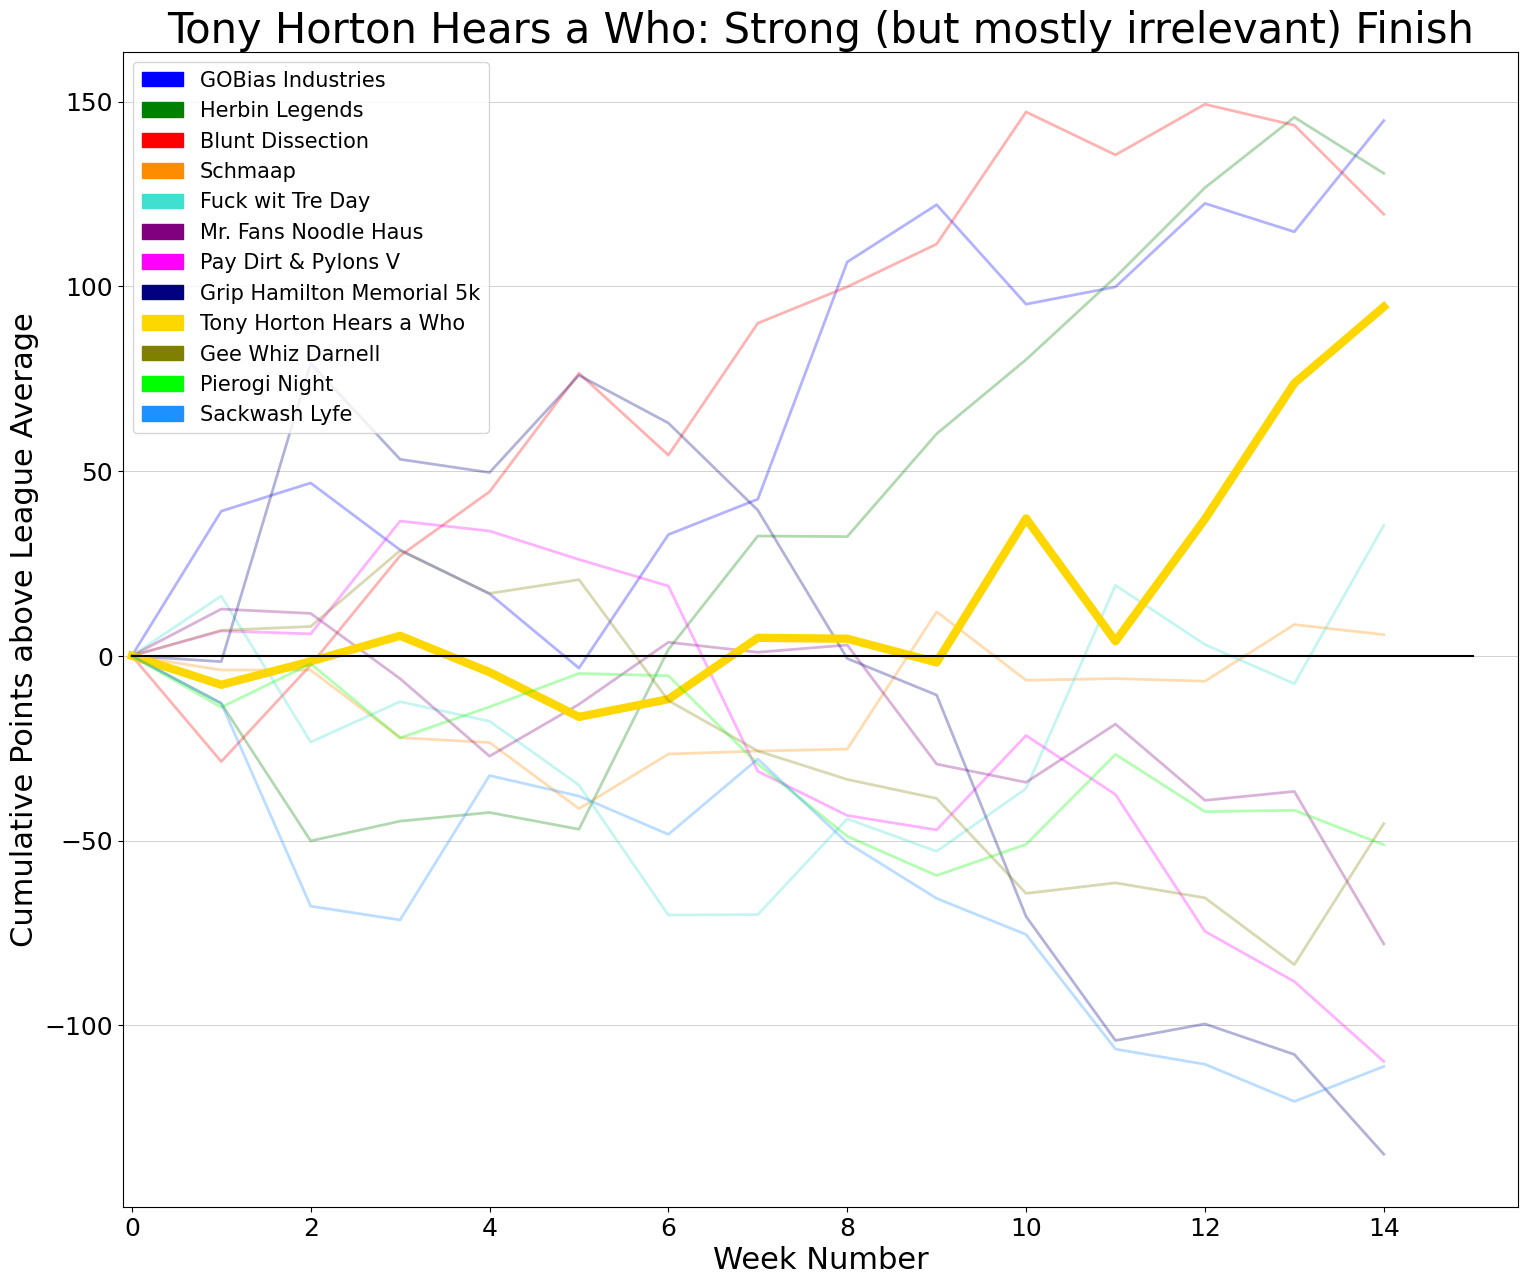

In [14]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    # Regular line plot for all lines except green
    if i != 8:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=2, alpha = 0.3)
    else:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=6)  # wider 1-9
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))

plt.plot([0.0, 15], [0, 0], color='k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Cumulative Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Tony Horton Hears a Who: Strong (but mostly irrelevant) Finish", size=30)

plt.legend(handles=patches, prop={'size': 15})
plt.grid(axis='y', lw=0.4)

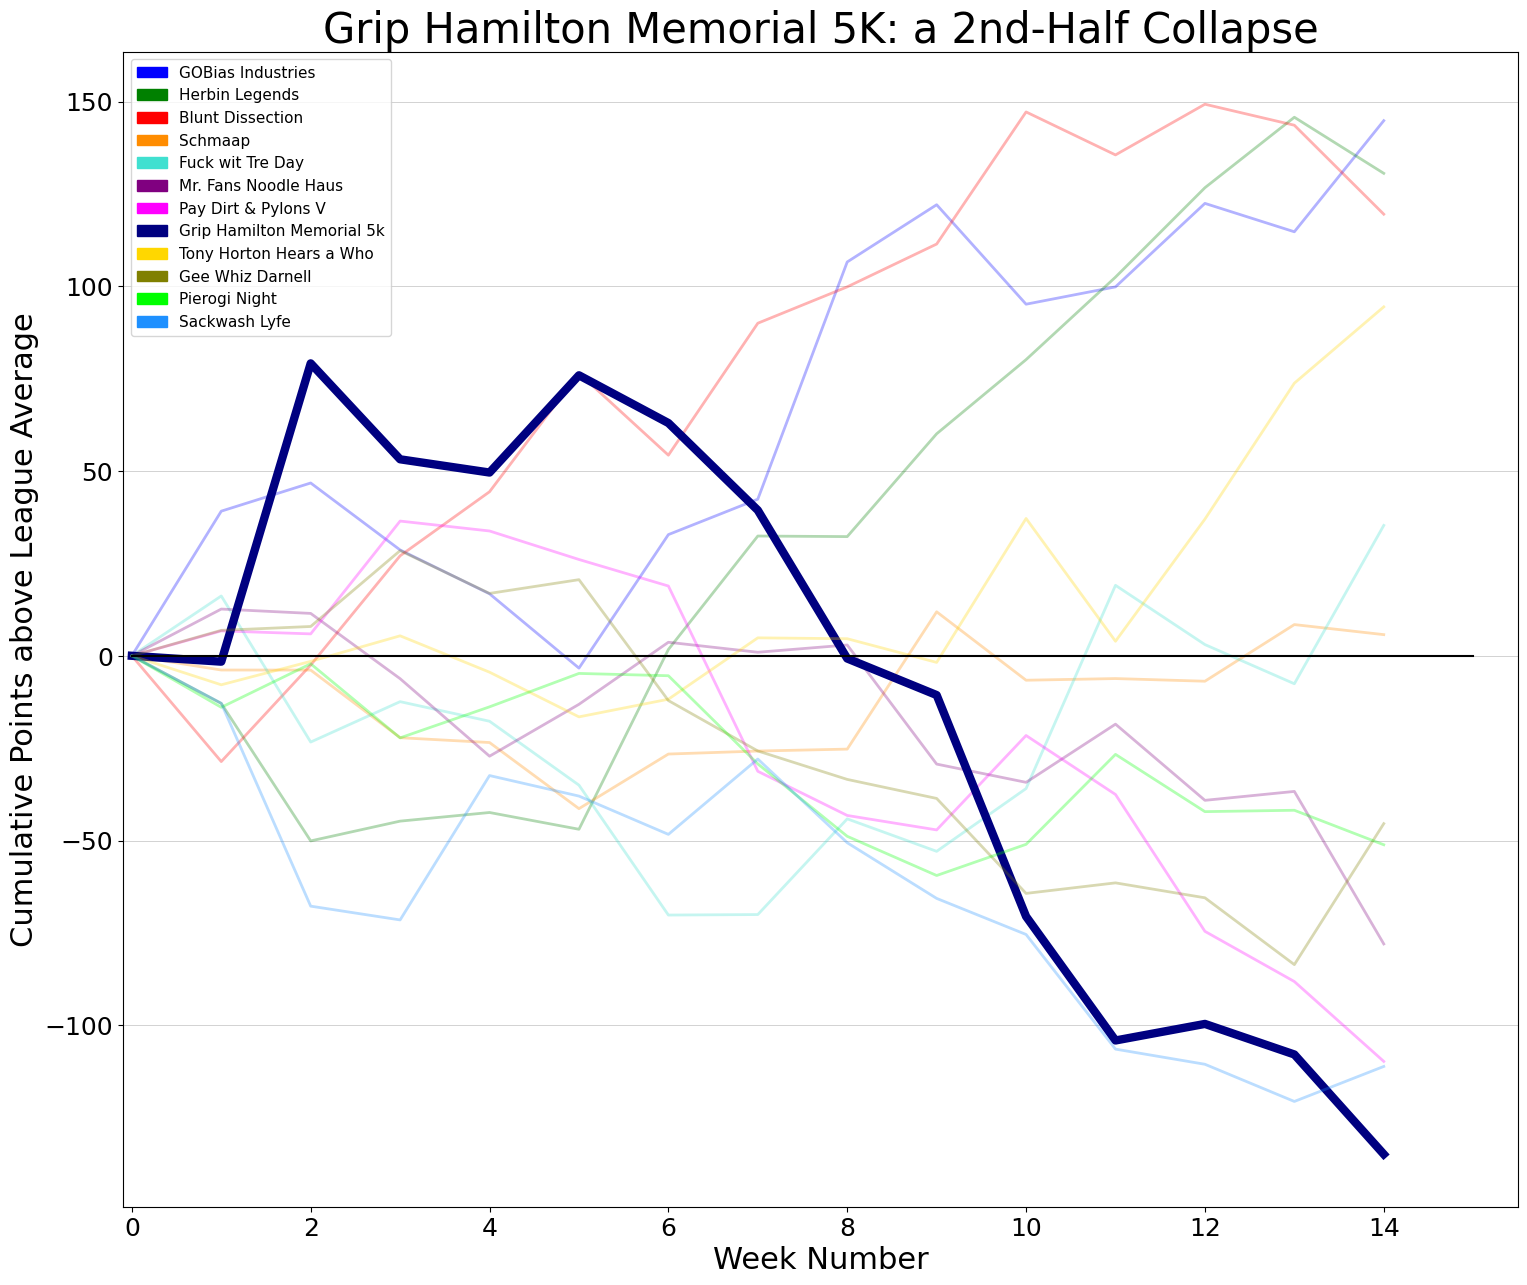

In [17]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    # Regular line plot for all lines except green
    if i != 7:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=2, alpha = 0.3)
    else:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=6)  # wider 1-9
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))

plt.plot([0.0, 15], [0, 0], color='k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Cumulative Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Grip Hamilton Memorial 5K: a 2nd-Half Collapse", size=30)

plt.legend(handles=patches, prop={'size': 11})
plt.grid(axis='y', lw=0.4)

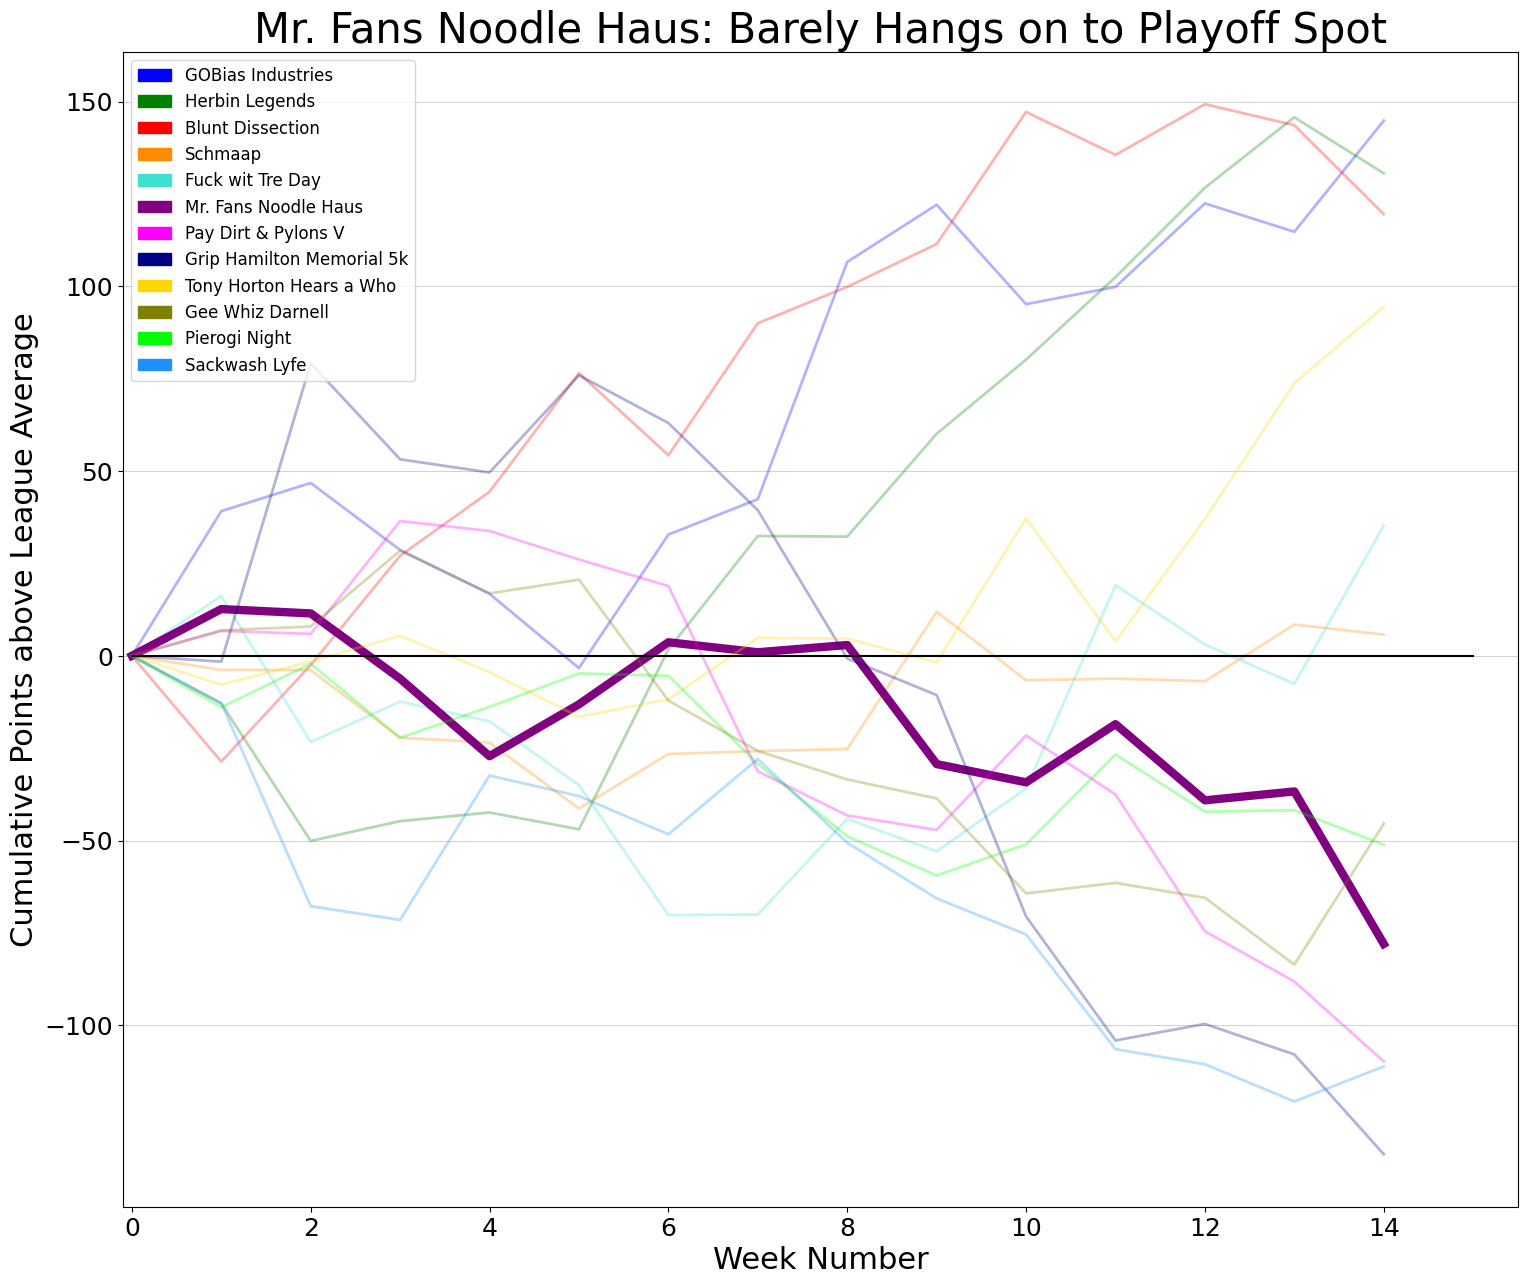

In [23]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    # Regular line plot for all lines except green
    if i != 5:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=2, alpha = 0.3)
    else:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=6)  # wider 1-9
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))

plt.plot([0.0, 15], [0, 0], color='k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Cumulative Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Mr. Fans Noodle Haus: Barely Hangs on to Playoff Spot", size=30)

plt.legend(handles=patches, prop={'size': 12})
plt.grid(axis='y', lw=0.4)

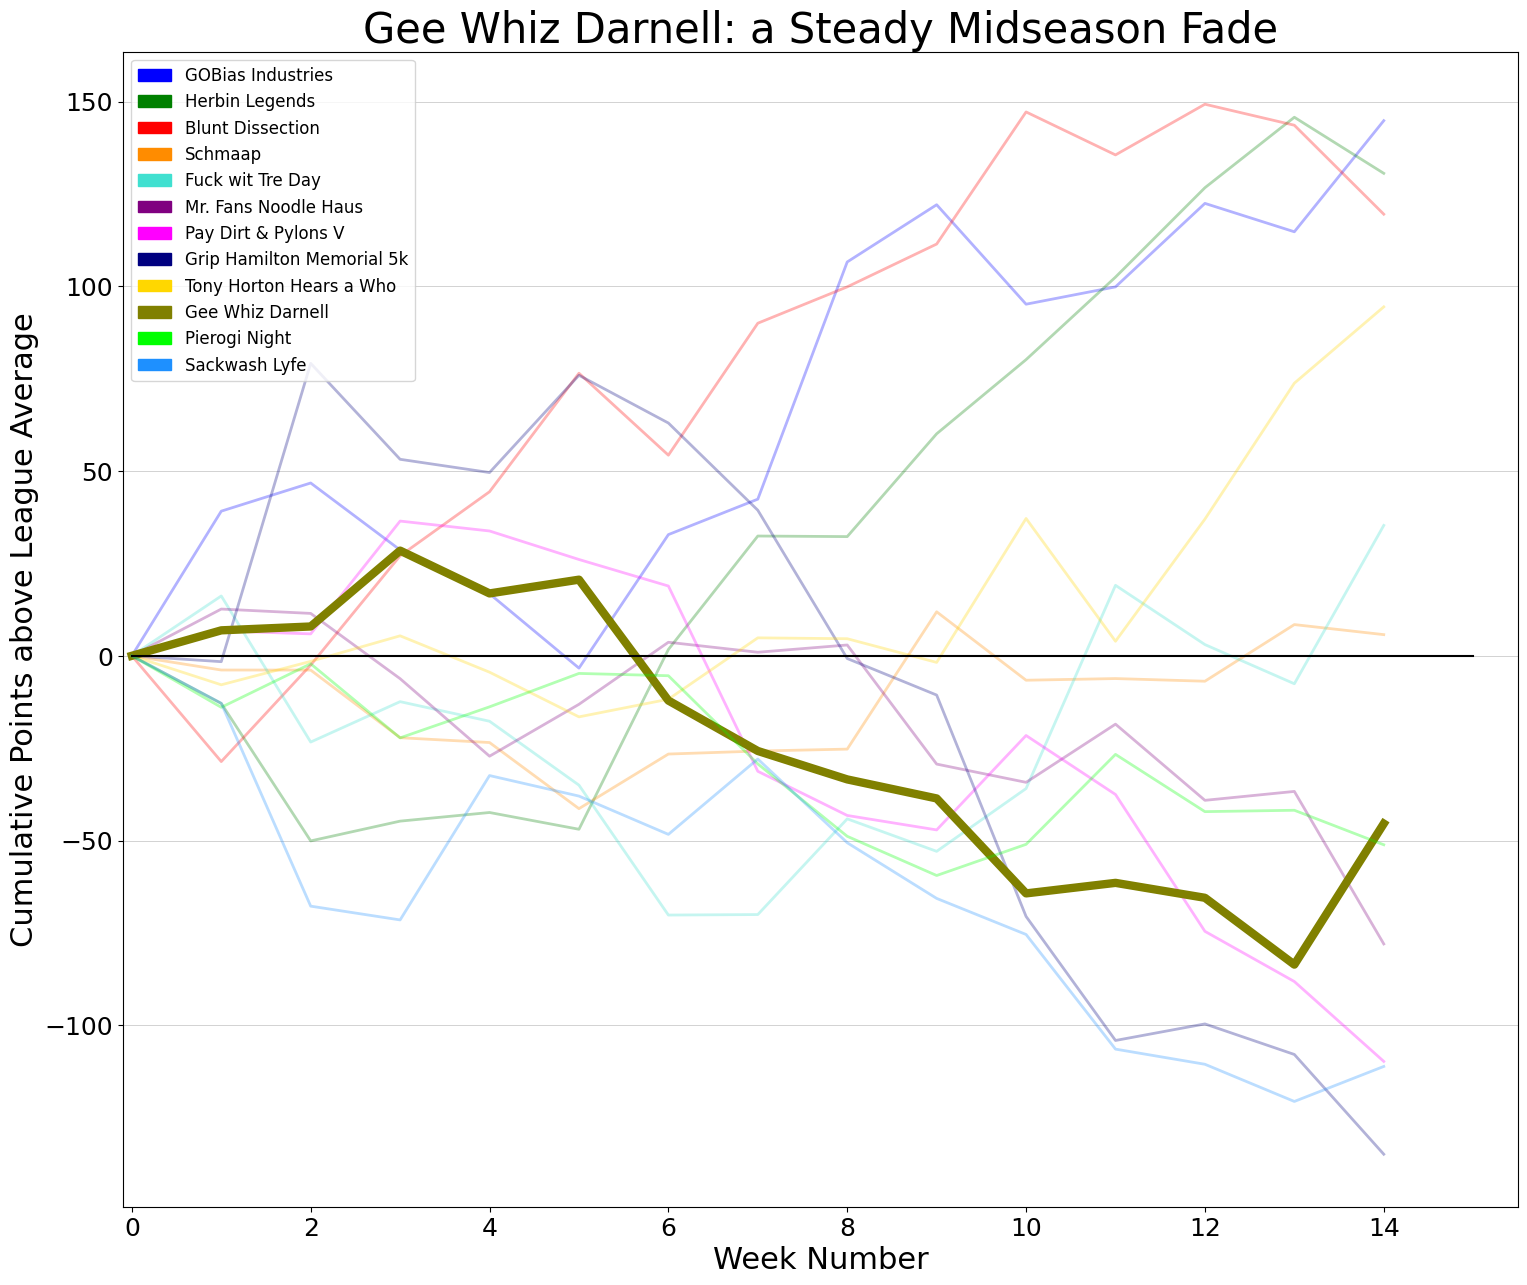

In [20]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    # Regular line plot for all lines except green
    if i != 9:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=2, alpha = 0.3)
    else:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=6)  # wider 1-9
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))

plt.plot([0.0, 15], [0, 0], color='k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Cumulative Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Gee Whiz Darnell: a Steady Midseason Fade", size=30)

plt.legend(handles=patches, prop={'size': 12})
plt.grid(axis='y', lw=0.4)

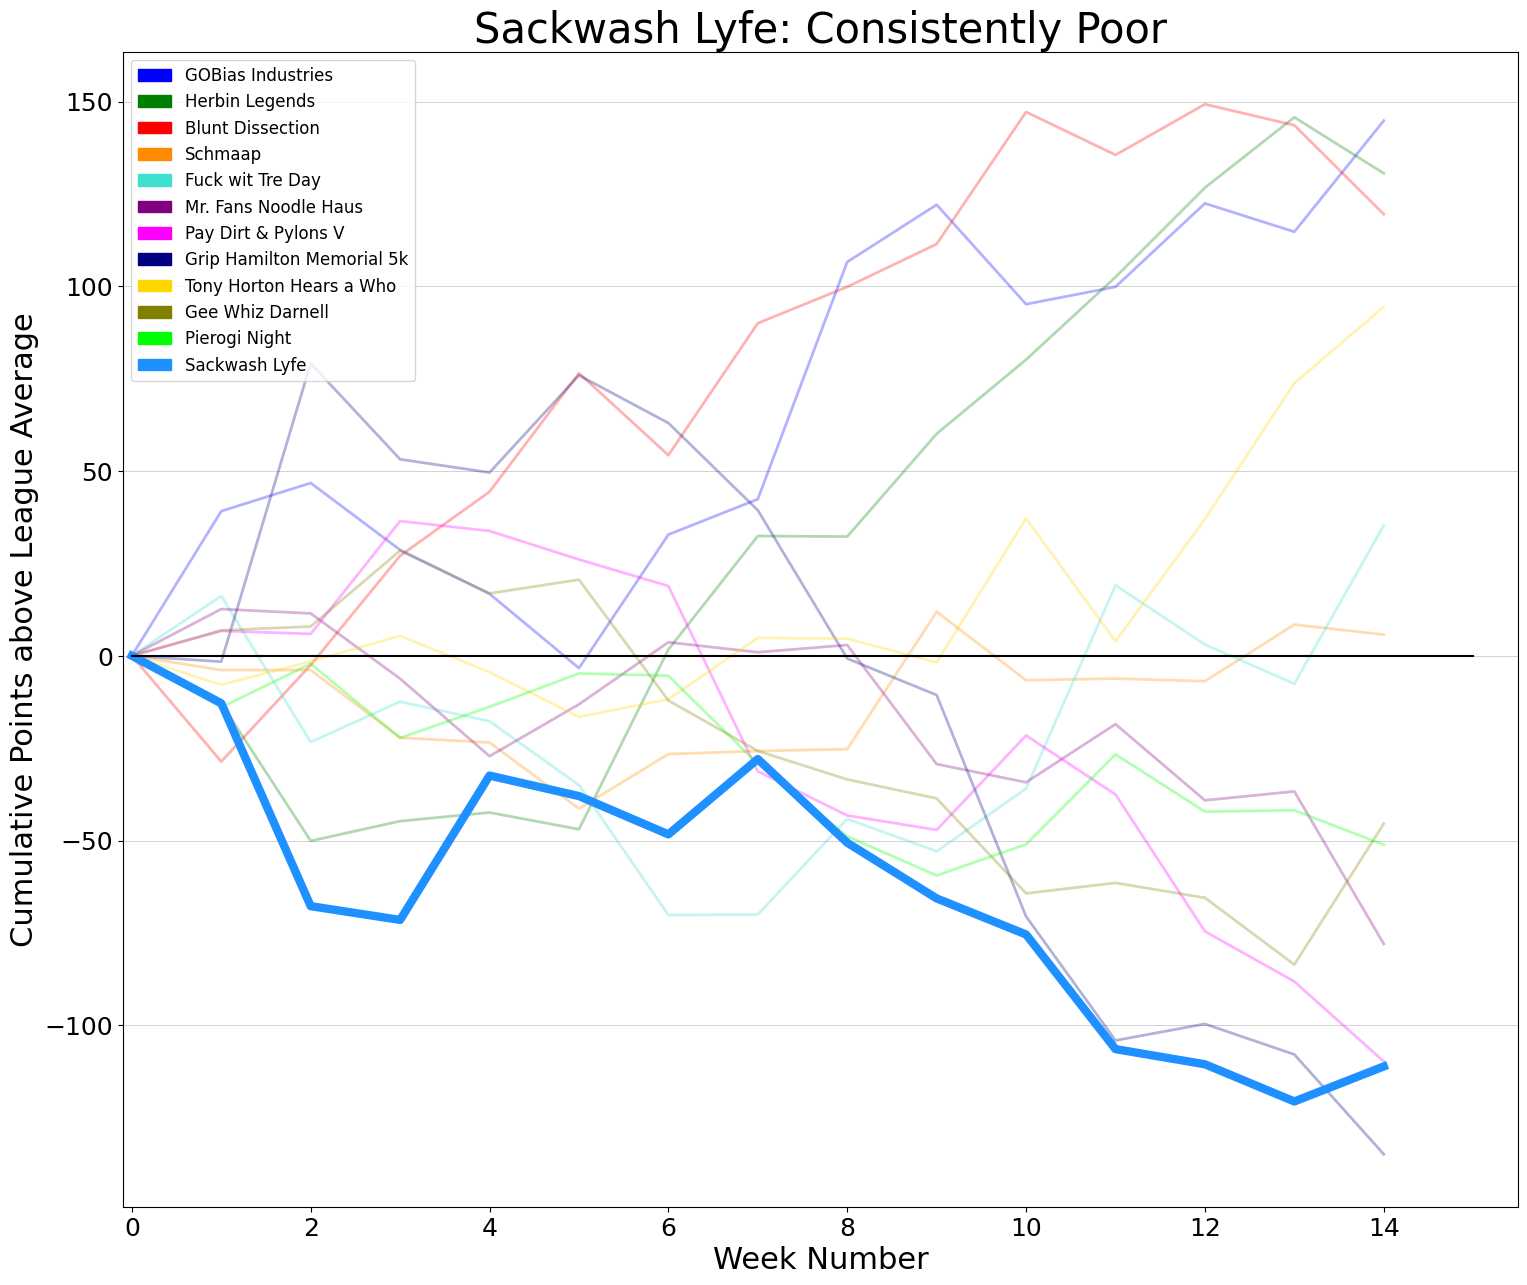

In [8]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    # Regular line plot for all lines except green
    if i != 11:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=2, alpha = 0.3)
    else:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=6)  # wider 1-9
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))

plt.plot([0.0, 15], [0, 0], color='k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Cumulative Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Sackwash Lyfe: Consistently Poor", size=30)

plt.legend(handles=patches, prop={'size': 12})
plt.grid(axis='y', lw=0.4)

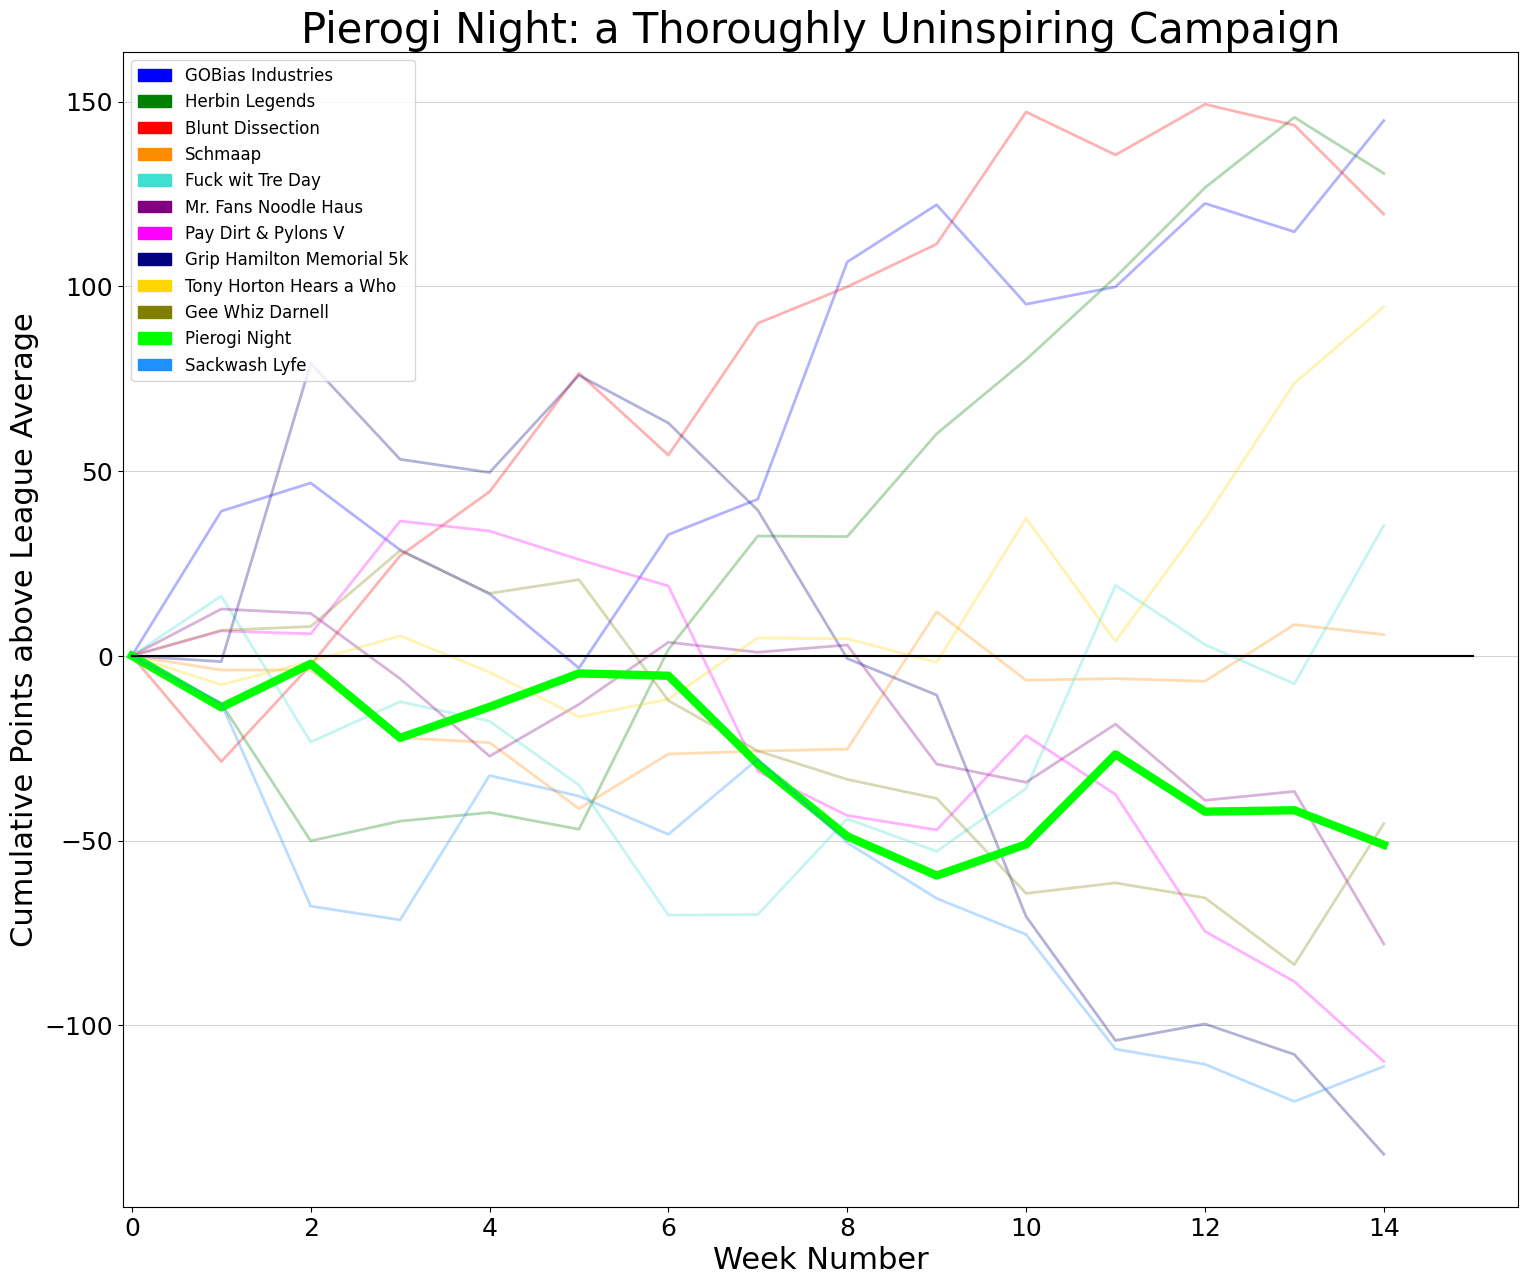

In [24]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    # Regular line plot for all lines except green
    if i != 10:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=2, alpha = 0.3)
    else:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=6)  # wider 1-9
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))

plt.plot([0.0, 15], [0, 0], color='k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Cumulative Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Pierogi Night: a Thoroughly Uninspiring Campaign", size=30)

plt.legend(handles=patches, prop={'size': 12})
plt.grid(axis='y', lw=0.4)

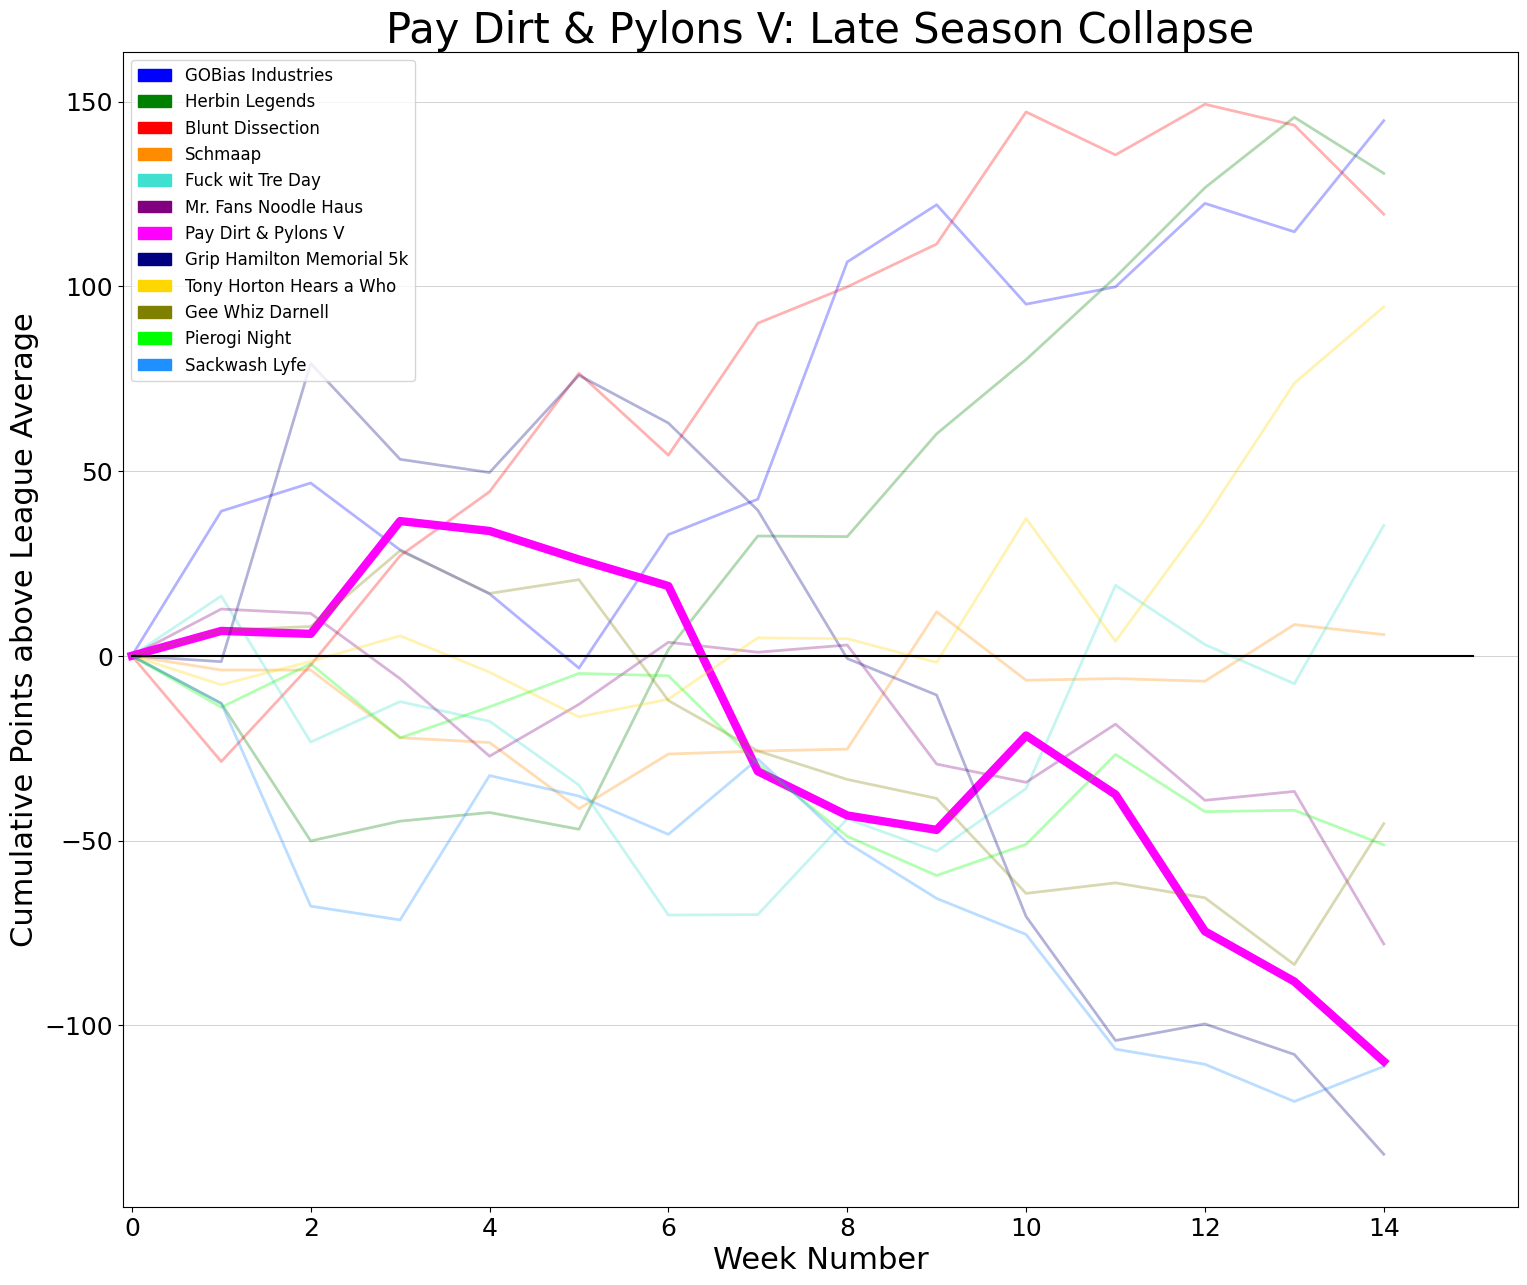

In [7]:
plt.figure(figsize=[18, 15])

colors = ['blue', 'green', 'red', 'darkorange', 'turquoise', 'purple',
          'magenta', 'navy', 'gold', 'olive', 'lime', 'dodgerblue']

patches = []
for i in range(12):
    # Regular line plot for all lines except green
    if i != 6:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=2, alpha = 0.3)
    else:
        plt.plot(np.array(cum_diffs[i, :]), colors[i], lw=6)  # wider 1-9
    patches.append(mpatches.Patch(color=colors[i], label=labels[i]))

plt.plot([0.0, 15], [0, 0], color='k')

plt.xlim([-0.1, 15.5])
plt.xlabel('Week Number', size=22)
plt.ylabel('Cumulative Points above League Average', size=22)
plt.xticks(size=18)
plt.yticks(size=18)
plt.title("Pay Dirt & Pylons V: Late Season Collapse", size=30)

plt.legend(handles=patches, prop={'size': 12})
plt.grid(axis='y', lw=0.4)